<a href="https://colab.research.google.com/github/standroidbeta/DS-Unit-2-Sprint-2-Regression/blob/master/DS-Unit-2-Sprint-2-Regression-Sprint-Challenge/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
3752,34,13400.0,0,137,4.5,1,1,2004,1
5508,34,34000.0,3,12,2.5,3,1,2014,2
3980,59,11100.0,4,180,1.5,0,1,2012,0
6526,4,21000.0,3,210,4.2,3,1,2009,1
7218,5,4099.0,3,50,2.5,3,1,1988,2
8127,77,7600.0,1,127,1.4,3,1,2007,0
2892,17,6000.0,1,11,1.5,1,1,2013,0
3006,76,3000.0,3,130,1.5,3,1,2003,0
787,12,5800.0,0,81,1.7,1,1,2007,1
6423,77,16450.0,5,143,2.0,0,1,2012,0


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
target = 'price'
df['Prediction'] = df[target].mean()
df['Error'] = df['Prediction'] - df[target]

In [4]:
df['Error'].sum()

6.984919309616089e-08

In [0]:
df['Square Error'] = df['Error'] **2

In [6]:
df['Absolute Error'] = df['Error'].abs()
df['Absolute Error'].sum()

106999911.3641919

In [7]:
df['Absolute Error'].mean()

12595.634062883242

In [8]:
mean_absolute_error(y_true=df[target], y_pred=df['Prediction'])

12595.634062883097

In [9]:
r2_score(y_true=df[target], y_pred=df['Prediction'])

2.220446049250313e-16

In [10]:
X = df.drop(columns='price')
y = df[['price']]

print(X.shape, y.shape)

(8495, 12) (8495, 1)


In [11]:
X.head()

,make,body,mileage,engV,engType,registration,year,drive,Prediction,Error,Square Error,Absolute Error
0,23,0,68,2.5,1,1,2010,1,16185.453305,685.453305,4.698462e+05,685.453305
1,50,3,173,1.8,1,1,2011,2,16185.453305,-4314.546695,1.861531e+07,4314.546695
2,50,2,135,5.5,3,1,2008,2,16185.453305,-18814.546695,3.539872e+08,18814.546695
3,50,5,162,1.8,0,1,2012,0,16185.453305,-1614.546695,2.606761e+06,1614.546695
4,55,0,83,2.0,3,1,2013,1,16185.453305,-414.546695,1.718490e+05,414.546695


In [12]:
y.head()

,price
0,15500.0
1,20500.0
2,35000.0
3,17800.0
4,16600.0


## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6796, 12) (1699, 12) (6796, 1) (1699, 1)


## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [0]:
features = ['make',	'body',	'mileage',	'engV',	'engType', 'year']

In [15]:
model = LinearRegression()
model.fit(X_train[features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [16]:
model.coef_, model.intercept_

(array([[  -79.09722108, -2549.86215304,   -42.34233235,   343.92459753,
         -1424.56566998,   972.96362941]]), array([-1919203.33977029]))

## 1.5 Use the test data to make predictions.

In [17]:
model.predict(X_test[features])

array([[21421.62317976],
       [ 8940.60393565],
       [28640.58120864],
       ...,
       [18014.48510784],
       [-5007.48466924],
       [15486.71150024]])

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [18]:
target = 'price'
features = ['year']
y = df[target]
X = df[features]

def run_linear_model(X, y):
    # Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

    # Fit model using train data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using test features
    y_pred = model.predict(X_test)

    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)

    print('Root Mean Squared Error', rmse)
    print('R^2 Score', r2)
    print('Intercept', model.intercept_)
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())
    
run_linear_model(X, y)

Root Mean Squared Error 23426.884148491128
R^2 Score 0.15125166500643616
Intercept -2763069.435916216
year    1385.055928


In [19]:
features = ['make',	'body',	'mileage',	'engV',	'engType', 'year']

y = df[target]
X = df[features]

def run_linear_model(X, y):
    # Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

    # Fit model using train data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions using test features
    y_pred = model.predict(X_test)

    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)

    print('Root Mean Squared Error', rmse)
    print('R^2 Score', r2)
    print('Intercept', model.intercept_)
    coefficients = pd.Series(model.coef_, X_train.columns)
    print(coefficients.to_string())
    
run_linear_model(X, y)

Root Mean Squared Error 22348.541244619842
R^2 Score 0.22758937879444974
Intercept -1919203.3397702905
make        -79.097221
body      -2549.862153
mileage     -42.342332
engV        343.924598
engType   -1424.565670
year        972.963629


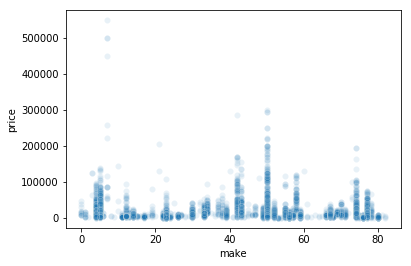

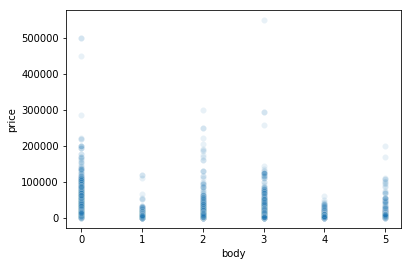

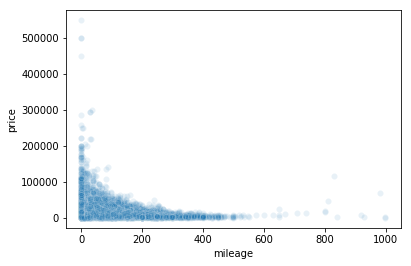

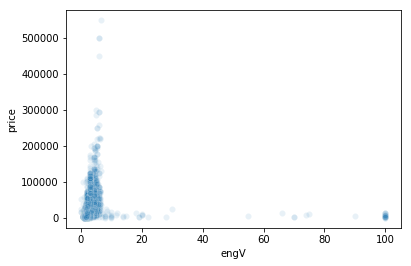

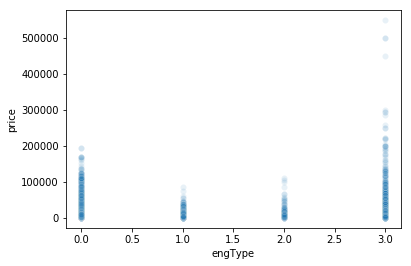

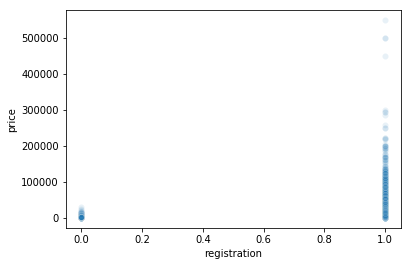

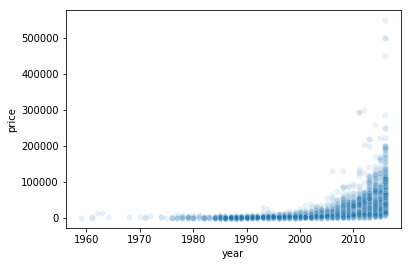

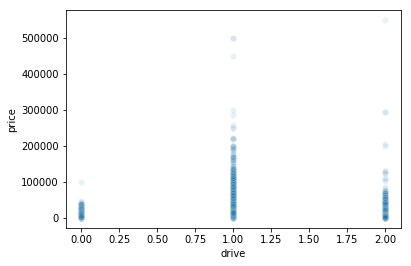

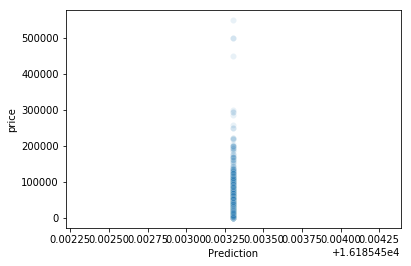

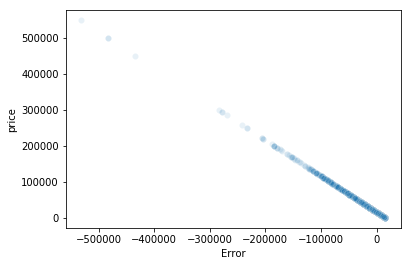

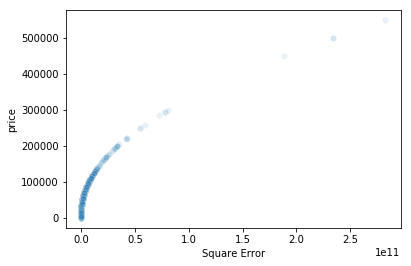

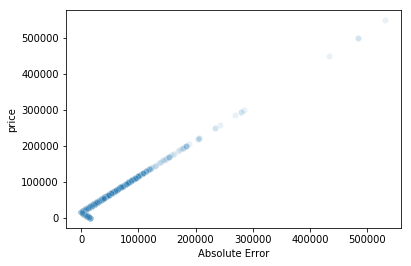

In [20]:
target = 'price'
numeric_columns = df.select_dtypes(include='number').columns
for feature in numeric_columns.drop(target):
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

##A:
*The year feature coefficient in the regression equation is 1385.06 as a bivariate and 972.96 as a multi-variate. These coefficients represent the mean increase of price for each year.*

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

##A:
*The root means square error is very high at 22348.54 which shows that there is a lot of variance at with this model currently.* 

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

##A:
*The $R^2$ result is very low which means that this model is currently underfit.* 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df['price'])

In [22]:
target = 'ln_price'
features = ['year']
y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 0.7142458455543887
R^2 Score 0.46768965138073926
Intercept -185.7831523369876
year    0.097168


In [23]:
target = 'ln_price'
features = ['make',	'body',	'mileage',	'engV',	'engType', 'year']
y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 0.6638914829717784
R^2 Score 0.5400997372424681
Intercept -170.3553915059201
make      -0.003092
body      -0.130170
mileage   -0.000297
engV       0.012014
engType   -0.061556
year       0.089755


## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

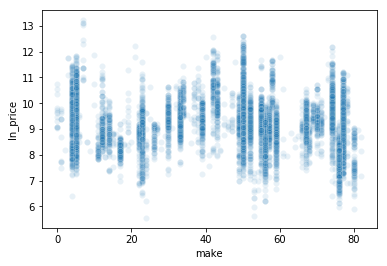

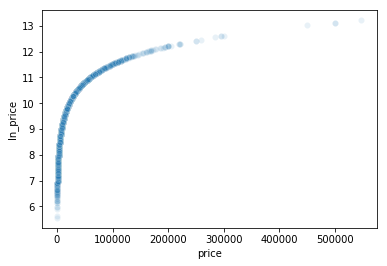

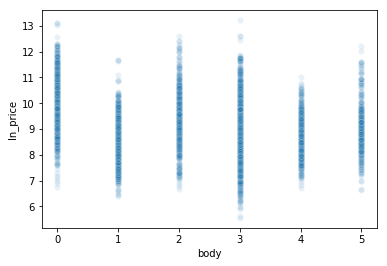

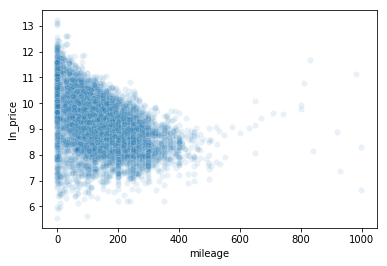

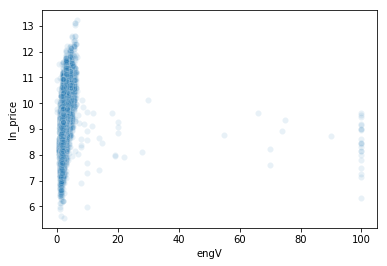

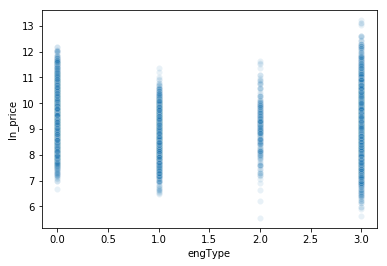

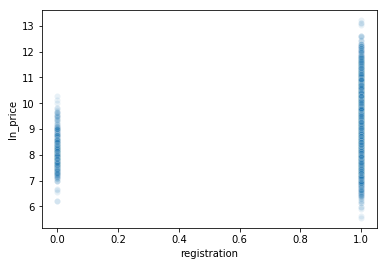

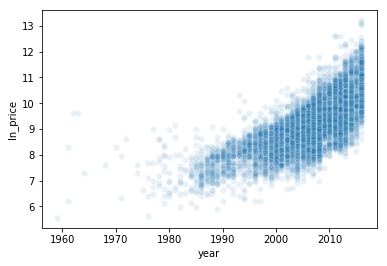

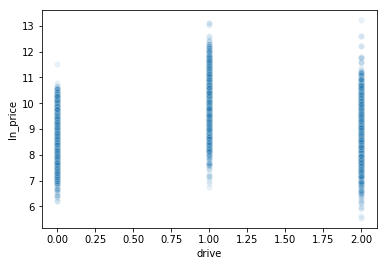

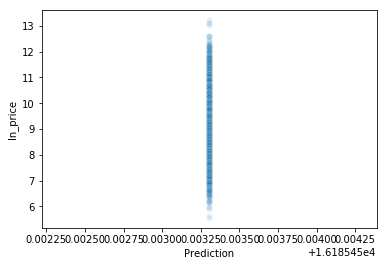

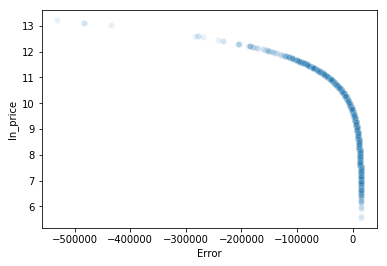

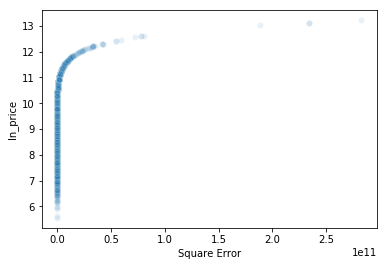

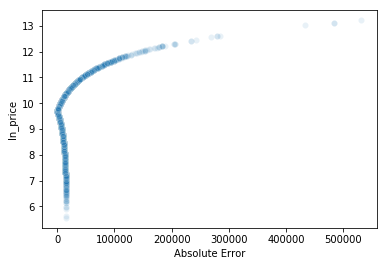

In [24]:
target = 'ln_price'
numeric_columns = df.select_dtypes(include='number').columns
for feature in numeric_columns.drop(target):
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [0]:
from sklearn.preprocessing import PolynomialFeatures

X = df[['body',	'engType']]
y = df[['price']]

interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)

In [0]:
regr = LinearRegression()

model = regr.fit(X_inter, y)

In [27]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [28600.34769389]
Coefficients: 
 [[-4420.80981806 -2005.94633552   315.66921858]]


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [28]:
target = 'ln_price'
features = ['make',	'body',	'mileage',	'engV',	'engType', 'year']
y = df[target]
X = df[features]

run_linear_model(X, y)

Root Mean Squared Error 0.6638914829717784
R^2 Score 0.5400997372424681
Intercept -170.3553915059201
make      -0.003092
body      -0.130170
mileage   -0.000297
engV       0.012014
engType   -0.061556
year       0.089755


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

##A:

*Log-Linear Regression helps to normalize the output for better interpretation due to reducing the pull to outlier values.*

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient